In [3]:
!pip install beautifulsoup4 requests pandas numpy matplotlib seaborn wordcloud textblob scikit-learn streamlit pyngrok

Starting web scraping...

Scraping for query: physical therapy genu valgum knee valgus
Scraped article 1/12: Immediate Effect of Ankle Mobilization on Range of...
Scraped article 2/12: Three-dimensional hip and knee kinematics during w...
Scraped article 3/12: Effect of valgus knee alignment on gait biomechani...
Scraped article 4/12: Knee mechanics during a change of direction moveme...
Scraped article 5/12: Relationship between knee alignment in asymptomati...
Scraped article 6/12: Postural Assessment in Class III Patients Before O...
Scraped article 7/12: Effects of a knee valgus unloader brace on medial ...
Scraped article 8/12: Effects of an elastic resistance band exercise pro...
Scraped article 9/12: Trunk and lower extremity segment kinematics and t...
Scraped article 10/12: Neuromuscular training improves knee kinematics, i...
Scraped article 11/12: [Evaluation of the locomotor system during pediatr...
Scraped article 12/12: Knock knee and the gait of six-year-old children...


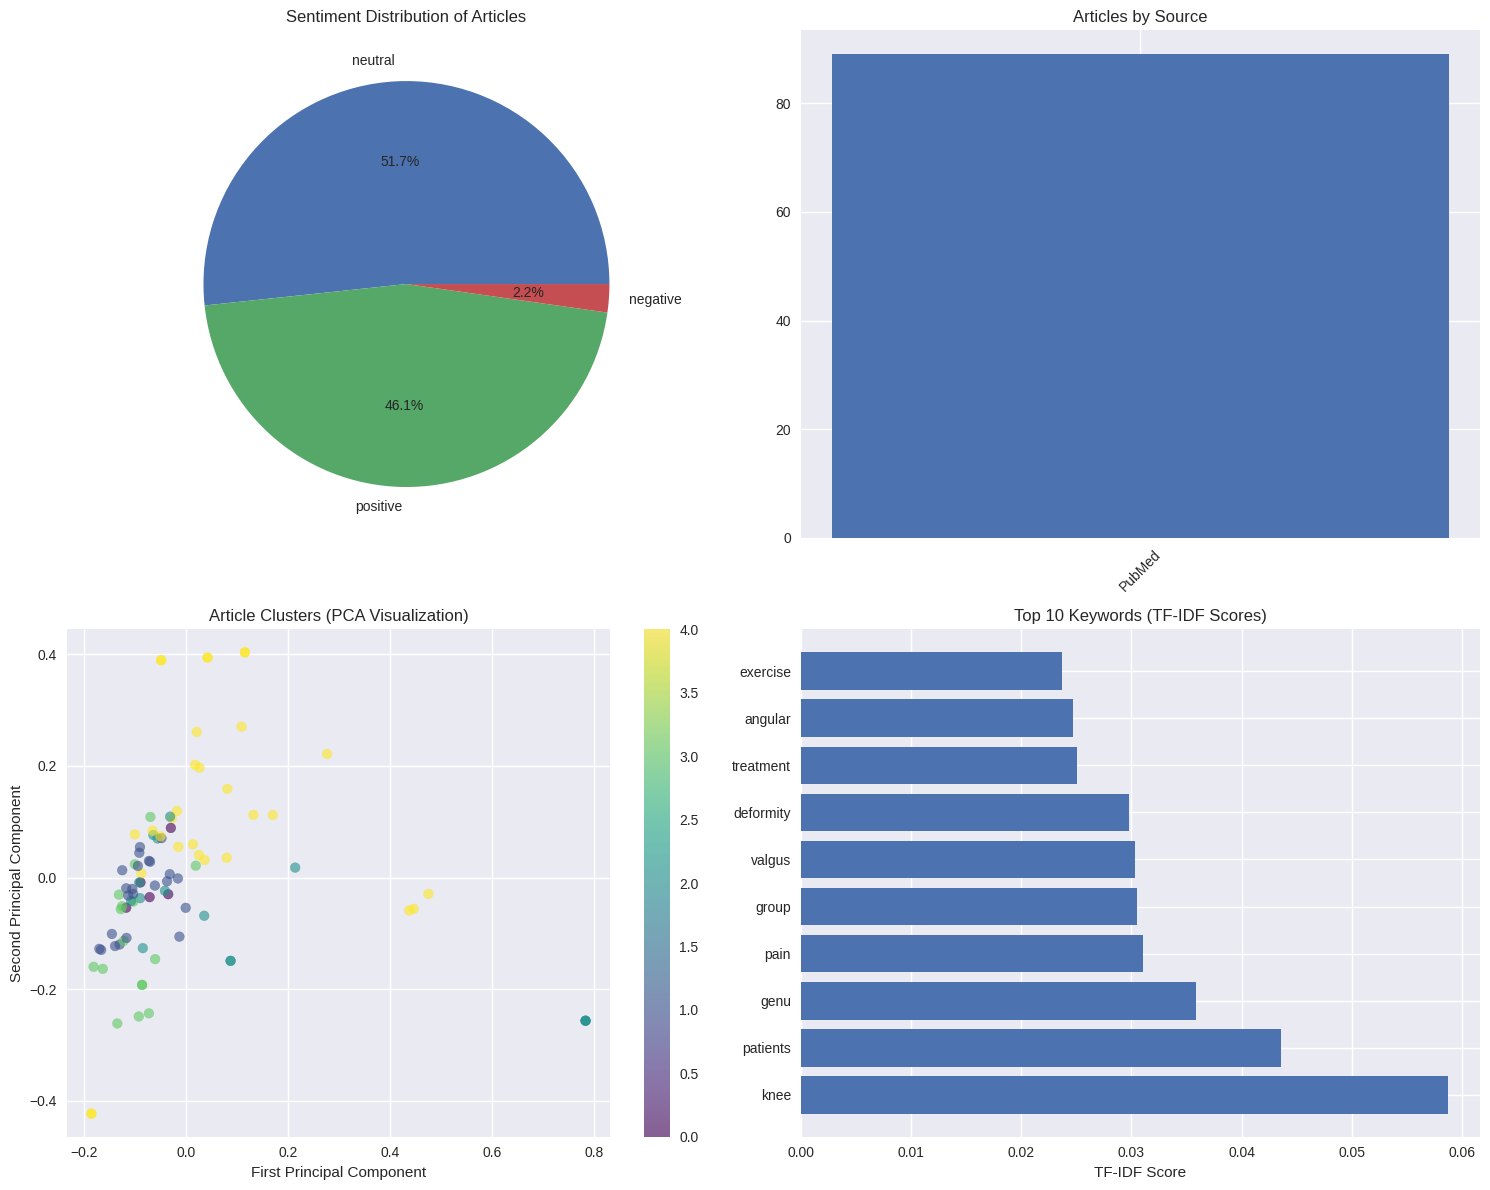

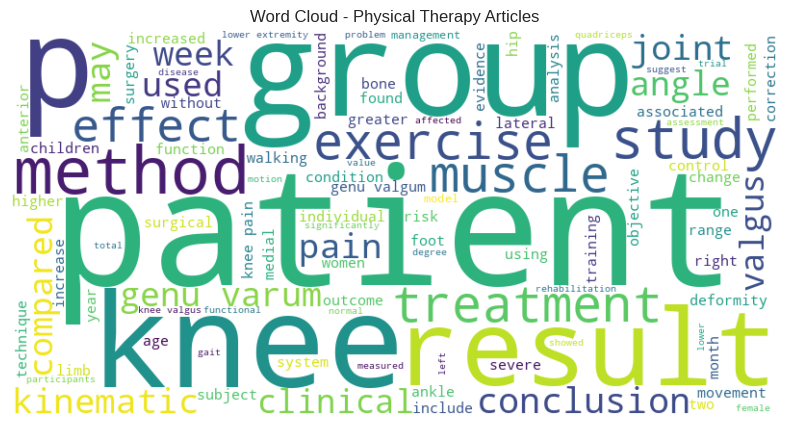


ANALYSIS RESULTS
total_articles: 89
sources: {'PubMed': 89}
sentiment_distribution: {'neutral': 46, 'positive': 41, 'negative': 2}
avg_polarity: 0.08526880178738062
avg_subjectivity: 0.4383283212858583
cluster_distribution: {4: 30, 1: 23, 3: 16, 2: 15, 0: 5}

Top 10 Keywords:
1. knee: 0.0587
2. patients: 0.0435
3. genu: 0.0359
4. pain: 0.0311
5. group: 0.0305
6. valgus: 0.0303
7. deformity: 0.0298
8. treatment: 0.0251
9. angular: 0.0247
10. exercise: 0.0237

Processed data saved to 'processed_physio_articles.csv'

Streamlit app saved as 'streamlit_app.py'

SETUP INSTRUCTIONS FOR COLAB + STREAMLIT

# SETUP UNTUK MENJALANKAN STREAMLIT DI GOOGLE COLAB

# 1. Install pyngrok untuk tunneling
!pip install pyngrok

# 2. Setup ngrok token (daftar di https://ngrok.com)
from pyngrok import ngrok
import threading
import time

# Ganti dengan auth token dari ngrok.com
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")

# 3. Jalankan Streamlit di background
def run_streamlit():
    !streamlit run streaml

In [4]:
# ===== BAGIAN 1: SETUP DAN SCRAPING (Google Colab) =====

# Install dependencies (jalankan di Colab)
!pip install beautifulsoup4 requests pandas numpy matplotlib seaborn wordcloud textblob scikit-learn streamlit pyngrok

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class PhysioTherapyScraper:
    def __init__(self):
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        self.articles = []

    def scrape_pubmed(self, query, max_articles=50):
        """Scraping artikel dari PubMed"""
        base_url = "https://pubmed.ncbi.nlm.nih.gov/"
        search_url = f"{base_url}?term={query.replace(' ', '+')}&size=200"

        try:
            response = requests.get(search_url, headers=self.headers)
            soup = BeautifulSoup(response.content, 'html.parser')

            article_links = soup.find_all('a', class_='docsum-title')[:max_articles]

            for i, link in enumerate(article_links):
                try:
                    article_url = base_url + link.get('href')
                    article_response = requests.get(article_url, headers=self.headers)
                    article_soup = BeautifulSoup(article_response.content, 'html.parser')

                    title = article_soup.find('h1', class_='heading-title')
                    title_text = title.text.strip() if title else "No title"

                    abstract = article_soup.find('div', class_='abstract-content')
                    abstract_text = abstract.text.strip() if abstract else "No abstract"

                    authors = article_soup.find('div', class_='authors-list')
                    authors_text = authors.text.strip() if authors else "No authors"

                    journal = article_soup.find('button', class_='journal-actions-trigger')
                    journal_text = journal.text.strip() if journal else "Unknown journal"

                    self.articles.append({
                        'title': title_text,
                        'abstract': abstract_text,
                        'authors': authors_text,
                        'journal': journal_text,
                        'url': article_url,
                        'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                        'source': 'PubMed'
                    })

                    print(f"Scraped article {i+1}/{len(article_links)}: {title_text[:50]}...")
                    time.sleep(1)  # Rate limiting

                except Exception as e:
                    print(f"Error scraping article {i+1}: {e}")
                    continue

        except Exception as e:
            print(f"Error accessing PubMed: {e}")

    def scrape_google_scholar(self, query, max_articles=30):
        """Scraping dari Google Scholar (simplified)"""
        # Note: Google Scholar has strict anti-bot measures
        # This is a simplified version for demonstration
        search_url = f"https://scholar.google.com/scholar?q={query.replace(' ', '+')}"

        try:
            response = requests.get(search_url, headers=self.headers)
            soup = BeautifulSoup(response.content, 'html.parser')

            results = soup.find_all('div', class_='gs_r gs_or gs_scl')[:max_articles]

            for i, result in enumerate(results):
                try:
                    title_elem = result.find('h3', class_='gs_rt')
                    title = title_elem.text.strip() if title_elem else "No title"

                    snippet_elem = result.find('div', class_='gs_rs')
                    snippet = snippet_elem.text.strip() if snippet_elem else "No snippet"

                    authors_elem = result.find('div', class_='gs_a')
                    authors = authors_elem.text.strip() if authors_elem else "No authors"

                    self.articles.append({
                        'title': title,
                        'abstract': snippet,
                        'authors': authors,
                        'journal': 'Google Scholar',
                        'url': search_url,
                        'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                        'source': 'Google Scholar'
                    })

                    print(f"Scraped Scholar article {i+1}/{len(results)}: {title[:50]}...")
                    time.sleep(2)  # Rate limiting

                except Exception as e:
                    print(f"Error scraping Scholar article {i+1}: {e}")
                    continue

        except Exception as e:
            print(f"Error accessing Google Scholar: {e}")

    def save_data(self, filename='physio_articles.csv'):
        """Simpan data ke CSV"""
        df = pd.DataFrame(self.articles)
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")
        return df

# ===== BAGIAN 2: ANALISIS DATA =====

class PhysioDataAnalyzer:
    def __init__(self, data):
        self.data = data
        self.processed_data = None

    def preprocess_text(self, text):
        """Preprocessing teks"""
        if pd.isna(text):
            return ""

        # Lowercase
        text = text.lower()

        # Remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        return text

    def analyze_sentiment(self):
        """Analisis sentiment menggunakan TextBlob"""
        sentiments = []

        for abstract in self.data['abstract']:
            if pd.notna(abstract) and abstract != "No abstract":
                blob = TextBlob(abstract)
                sentiment = {
                    'polarity': blob.sentiment.polarity,
                    'subjectivity': blob.sentiment.subjectivity,
                    'sentiment_label': 'positive' if blob.sentiment.polarity > 0.1
                                    else 'negative' if blob.sentiment.polarity < -0.1
                                    else 'neutral'
                }
            else:
                sentiment = {'polarity': 0, 'subjectivity': 0, 'sentiment_label': 'neutral'}

            sentiments.append(sentiment)

        sentiment_df = pd.DataFrame(sentiments)
        self.data = pd.concat([self.data, sentiment_df], axis=1)

        return sentiment_df

    def extract_keywords(self, n_keywords=20):
        """Ekstraksi kata kunci menggunakan TF-IDF"""
        # Gabungkan title dan abstract
        texts = []
        for idx, row in self.data.iterrows():
            text = f"{row['title']} {row['abstract']}"
            processed_text = self.preprocess_text(text)
            texts.append(processed_text)

        # TF-IDF
        vectorizer = TfidfVectorizer(
            max_features=1000,
            stop_words='english',
            ngram_range=(1, 2)
        )

        tfidf_matrix = vectorizer.fit_transform(texts)
        feature_names = vectorizer.get_feature_names_out()

        # Get top keywords
        mean_scores = np.mean(tfidf_matrix.toarray(), axis=0)
        keyword_scores = list(zip(feature_names, mean_scores))
        keyword_scores.sort(key=lambda x: x[1], reverse=True)

        top_keywords = keyword_scores[:n_keywords]

        return top_keywords, tfidf_matrix, vectorizer

    def cluster_articles(self, n_clusters=5):
        """Clustering artikel menggunakan K-Means"""
        top_keywords, tfidf_matrix, vectorizer = self.extract_keywords()

        # K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(tfidf_matrix)

        self.data['cluster'] = clusters

        # PCA untuk visualisasi
        pca = PCA(n_components=2, random_state=42)
        pca_result = pca.fit_transform(tfidf_matrix.toarray())

        self.data['pca_1'] = pca_result[:, 0]
        self.data['pca_2'] = pca_result[:, 1]

        return clusters, pca_result

    def generate_statistics(self):
        """Generate descriptive statistics"""
        stats = {
            'total_articles': len(self.data),
            'sources': self.data['source'].value_counts().to_dict(),
            'sentiment_distribution': self.data['sentiment_label'].value_counts().to_dict(),
            'avg_polarity': self.data['polarity'].mean(),
            'avg_subjectivity': self.data['subjectivity'].mean(),
            'cluster_distribution': self.data['cluster'].value_counts().to_dict() if 'cluster' in self.data.columns else {}
        }

        return stats

# ===== BAGIAN 3: SCRAPING DAN ANALISIS =====

# Inisialisasi scraper
scraper = PhysioTherapyScraper()

# Scraping artikel
queries = [
    "physical therapy genu valgum knee valgus",
    "physical therapy genu varum bow legs",
    "physiotherapy knock knees treatment",
    "exercise therapy leg deformity",
    "rehabilitation angular limb deformity"
]

print("Starting web scraping...")
for query in queries:
    print(f"\nScraping for query: {query}")
    scraper.scrape_pubmed(query, max_articles=20)
    time.sleep(3)  # Rate limiting

# Simpan data
df_articles = scraper.save_data('physio_therapy_articles.csv')

# Analisis data
print("\nStarting data analysis...")
analyzer = PhysioDataAnalyzer(df_articles)

# Sentiment analysis
sentiment_results = analyzer.analyze_sentiment()
print("Sentiment analysis completed.")

# Keyword extraction
keywords, tfidf_matrix, vectorizer = analyzer.extract_keywords()
print("Keyword extraction completed.")

# Clustering
clusters, pca_result = analyzer.cluster_articles()
print("Article clustering completed.")

# Statistics
stats = analyzer.generate_statistics()
print("Statistics generation completed.")

# ===== BAGIAN 4: VISUALISASI =====

def create_visualizations():
    """Membuat visualisasi data"""
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Sentiment Distribution
    sentiment_counts = analyzer.data['sentiment_label'].value_counts()
    axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Sentiment Distribution of Articles')

    # 2. Source Distribution
    source_counts = analyzer.data['source'].value_counts()
    axes[0, 1].bar(source_counts.index, source_counts.values)
    axes[0, 1].set_title('Articles by Source')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Cluster Visualization
    if 'cluster' in analyzer.data.columns:
        scatter = axes[1, 0].scatter(analyzer.data['pca_1'], analyzer.data['pca_2'],
                                   c=analyzer.data['cluster'], cmap='viridis', alpha=0.6)
        axes[1, 0].set_title('Article Clusters (PCA Visualization)')
        axes[1, 0].set_xlabel('First Principal Component')
        axes[1, 0].set_ylabel('Second Principal Component')
        plt.colorbar(scatter, ax=axes[1, 0])

    # 4. Top Keywords
    top_10_keywords = keywords[:10]
    keyword_names = [kw[0] for kw in top_10_keywords]
    keyword_scores = [kw[1] for kw in top_10_keywords]

    axes[1, 1].barh(keyword_names, keyword_scores)
    axes[1, 1].set_title('Top 10 Keywords (TF-IDF Scores)')
    axes[1, 1].set_xlabel('TF-IDF Score')

    plt.tight_layout()
    plt.savefig('physio_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate visualizations
create_visualizations()

# Word Cloud
def create_wordcloud():
    """Membuat word cloud"""
    all_text = ' '.join(analyzer.data['abstract'].dropna())
    processed_text = analyzer.preprocess_text(all_text)

    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         max_words=100).generate(processed_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Physical Therapy Articles')
    plt.savefig('physio_wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()

create_wordcloud()

# Print statistics
print("\n" + "="*50)
print("ANALYSIS RESULTS")
print("="*50)
for key, value in stats.items():
    print(f"{key}: {value}")

print("\nTop 10 Keywords:")
for i, (keyword, score) in enumerate(keywords[:10], 1):
    print(f"{i}. {keyword}: {score:.4f}")

# Save processed data
analyzer.data.to_csv('processed_physio_articles.csv', index=False)
print("\nProcessed data saved to 'processed_physio_articles.csv'")

# ===== BAGIAN 5: STREAMLIT APP =====

streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure page
st.set_page_config(
    page_title="Physical Therapy Big Data Analysis",
    page_icon="🦵",
    layout="wide"
)

# Title and description
st.title("🦵 Big Data Analysis: Terapi Fisik Kelainan Kaki X dan O")
st.markdown("""
Dashboard ini menampilkan hasil analisis big data dari artikel-artikel penelitian
tentang terapi fisik untuk kelainan kaki X (genu valgum) dan kaki O (genu varum).
""")

# Load data
@st.cache_data
def load_data():
    try:
        return pd.read_csv('processed_physio_articles.csv')
    except FileNotFoundError:
        st.error("Data file tidak ditemukan. Pastikan sudah menjalankan scraping dan analisis.")
        return None

data = load_data()

if data is not None:
    # Sidebar
    st.sidebar.header("Filter Data")

    # Source filter
    sources = data['source'].unique()
    selected_sources = st.sidebar.multiselect("Pilih Sumber:", sources, default=sources)

    # Sentiment filter
    sentiments = data['sentiment_label'].unique()
    selected_sentiments = st.sidebar.multiselect("Pilih Sentiment:", sentiments, default=sentiments)

    # Filter data
    filtered_data = data[
        (data['source'].isin(selected_sources)) &
        (data['sentiment_label'].isin(selected_sentiments))
    ]

    # Main dashboard
    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.metric("Total Artikel", len(filtered_data))

    with col2:
        avg_polarity = filtered_data['polarity'].mean()
        st.metric("Rata-rata Polarity", f"{avg_polarity:.3f}")

    with col3:
        avg_subjectivity = filtered_data['subjectivity'].mean()
        st.metric("Rata-rata Subjectivity", f"{avg_subjectivity:.3f}")

    with col4:
        if 'cluster' in filtered_data.columns:
            n_clusters = filtered_data['cluster'].nunique()
            st.metric("Jumlah Cluster", n_clusters)

    st.markdown("---")

    # Visualizations
    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Distribusi Sentiment")
        sentiment_counts = filtered_data['sentiment_label'].value_counts()
        fig_pie = px.pie(values=sentiment_counts.values, names=sentiment_counts.index,
                        title="Distribusi Sentiment Artikel")
        st.plotly_chart(fig_pie, use_container_width=True)

    with col2:
        st.subheader("Distribusi Sumber")
        source_counts = filtered_data['source'].value_counts()
        fig_bar = px.bar(x=source_counts.index, y=source_counts.values,
                        title="Jumlah Artikel per Sumber")
        st.plotly_chart(fig_bar, use_container_width=True)

    # Cluster visualization
    if 'cluster' in filtered_data.columns and 'pca_1' in filtered_data.columns:
        st.subheader("Visualisasi Cluster Artikel")
        fig_scatter = px.scatter(filtered_data, x='pca_1', y='pca_2',
                               color='cluster', hover_data=['title'],
                               title="Cluster Artikel (PCA Visualization)")
        st.plotly_chart(fig_scatter, use_container_width=True)

    # Sentiment over time (if date available)
    st.subheader("Analisis Sentiment vs Polarity")
    fig_scatter2 = px.scatter(filtered_data, x='polarity', y='subjectivity',
                             color='sentiment_label', hover_data=['title'],
                             title="Hubungan Polarity dan Subjectivity")
    st.plotly_chart(fig_scatter2, use_container_width=True)

    # Data table
    st.subheader("Data Artikel")
    display_columns = ['title', 'authors', 'source', 'sentiment_label', 'polarity']
    if all(col in filtered_data.columns for col in display_columns):
        st.dataframe(filtered_data[display_columns])
    else:
        st.dataframe(filtered_data)

    # Download button
    csv = filtered_data.to_csv(index=False)
    st.download_button(
        label="Download Data as CSV",
        data=csv,
        file_name='filtered_physio_articles.csv',
        mime='text/csv'
    )

else:
    st.error("Tidak dapat memuat data. Pastikan file data tersedia.")
'''

# Save Streamlit app
with open('streamlit_app.py', 'w') as f:
    f.write(streamlit_code)

print("\nStreamlit app saved as 'streamlit_app.py'")

# ===== BAGIAN 6: SETUP UNTUK COLAB + STREAMLIT =====
colab_streamlit_setup = '''
# SETUP UNTUK MENJALANKAN STREAMLIT DI GOOGLE COLAB

# 1. Install pyngrok untuk tunneling
!pip install pyngrok

# 2. Setup ngrok token (daftar di https://ngrok.com)
from pyngrok import ngrok
import threading
import time

# Ganti dengan auth token dari ngrok.com
ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")

# 3. Jalankan Streamlit di background
def run_streamlit():
    !streamlit run streamlit_app.py --server.port 8501 --server.address 0.0.0.0

# Start Streamlit in background
streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.daemon = True
streamlit_thread.start()

# Wait for Streamlit to start
time.sleep(10)

# 4. Create ngrok tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit app is running at: {public_url}")
'''

print("\n" + "="*60)
print("SETUP INSTRUCTIONS FOR COLAB + STREAMLIT")
print("="*60)
print(colab_streamlit_setup)

print("\n" + "="*60)
print("CARA PENGGUNAAN:")
print("="*60)
print("1. Jalankan semua kode di atas di Google Colab")
print("2. Daftar di https://ngrok.com dan dapatkan auth token")
print("3. Ganti 'YOUR_NGROK_AUTH_TOKEN' dengan token Anda")
print("4. Jalankan setup Streamlit")
print("5. Akses URL yang diberikan untuk melihat dashboard")
print("="*60)